In [38]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv("Data_Network.csv", delimiter=";")
SenatorList = pd.read_csv("SenatorList.csv", delimiter=";")
Democrats = list(SenatorList[SenatorList["Party"]=="D"]["Senator"])
Republicans = list(SenatorList[SenatorList["Party"]=="R"]["Senator"])

In [40]:
data = data.set_index("Senator")
SenatorList = SenatorList.set_index("Senator")

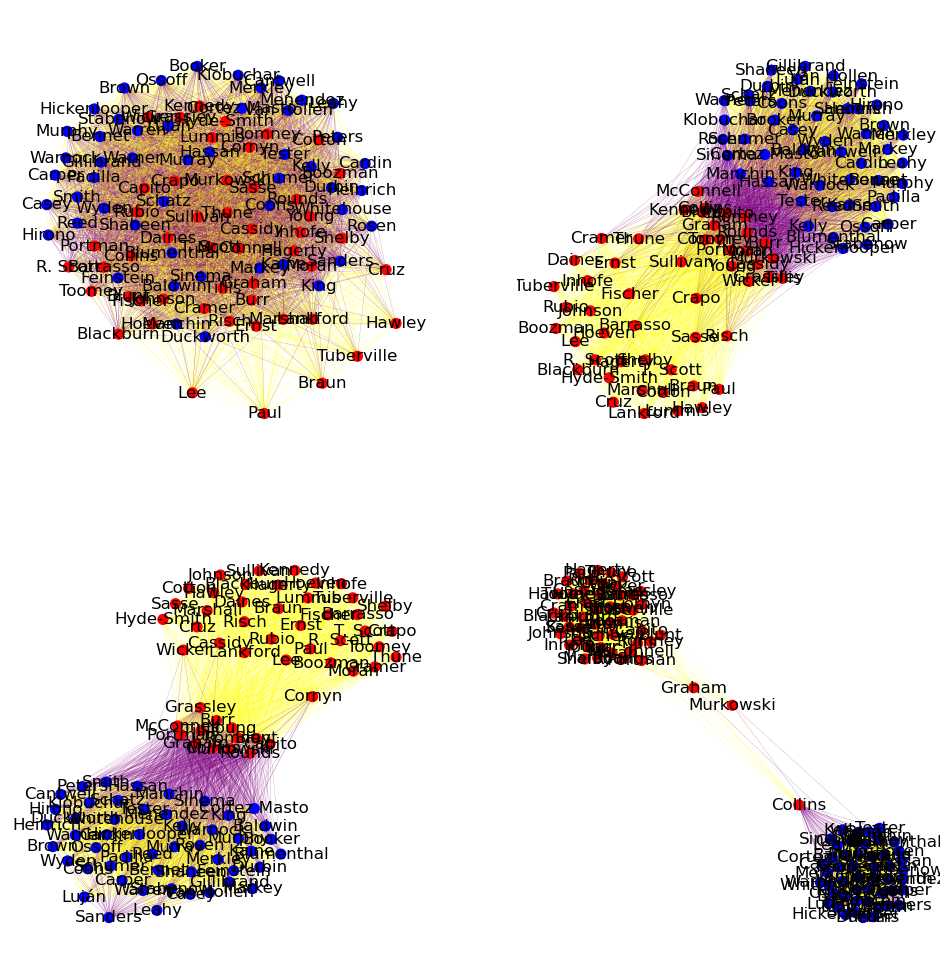

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,12))
ax = axes.flatten()



threshold = [0.1,0.2,0.3,0.6]

for l,t in enumerate(threshold):
    G = nx.Graph()
    for i, senator1 in enumerate(data.columns):
        for senator2 in data.index[i+1:]:
            if data.loc[senator1,senator2] > t:
                G.add_edge(senator1, senator2, aggreementP=data.loc[senator1,senator2])
    edgecolors = ["yellow" if SenatorList.loc[senator1,"Party"]==SenatorList.loc[senator2,"Party"] else "purple" for (senator1,senator2) in G.edges]
    nodecolors = ["red" if node in Republicans else "blue" for node in G.nodes]
    nx.draw(G, node_size=50, edge_color=edgecolors, node_color=nodecolors, width=0.1, ax=ax[l],with_labels=True)
    ax[l].title.set_color('white')
    ax[l].set_title(str(round(t*100,0)) + "% agreement threshhold")
    fig.set_facecolor('w')
